# **스테이지 3. 모델링 기초**

In [1]:
# drive에 연결합니다.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 현재 데이터가 있는 공간으로 작업 경로를 변경해줍니다.
%cd "/content/drive/MyDrive/ML_Data/Dacon/데이크루6기/신용카드/open"

Mounted at /content/drive
/content/drive/MyDrive/ML_Data/Dacon/데이크루6기/신용카드/open


## **Intro**
어느덧 스테이지 1과 2를 마치고 벌써 세 번째 스테이지입니다!<br>
스테이지 3에서는 **모델링**에 대해서 배워볼게요~<br>
우선 데이터를 먼저 불러오도록 하겠습니다!


In [2]:
# pandas 패키지를 pd라는 별칭으로 불러옵니다.
import pandas as pd

# train 데이터를 불러옵니다.
train = pd.read_csv('train.csv')
# test 데이터를 불러옵니다.
test = pd.read_csv('test.csv')
# submission 데이터를 불러옵니다.
submission = pd.read_csv('sample_submission.csv')

이제 데이터도 불러왔으니 본격적으로 모델링을 해보도록 할게요!<br>

🙋 모델링이란?<br>
모델링이란 주어진 데이터를 기반으로 패턴을 파악하거나 예측하기 위해<br>
수학적, 통계적 모델을 만들고 활용하는 과정을 말합니다.<br>
이렇게 만들어진 모델은 학습데이터를 기반으로 학습하고 최종적으로<br>
예측결과를 만들어내는 역할을 합니다!

이번 스테이지에서 저희는 기계 학습(machine learning)을 이용한<br>
<font color=#8258FA>**신용카드 사용자의 연체 예측**</font>을 해보도록 할게요.

<img src="https://www.nvidia.com/content/dam/en-zz/Solutions/glossary/data-science/machine-learning/img-1.png">

본격적으로 모델링에 들어가기 전에 두 가지 개념을 짚고 넘어가도록 할게요~

### **1. Feature & Target**

첫 번째는 Feature와 Target입니다.<br>
feature는 예측을 위해 모델이 학습하는 변수들을 말합니다! 독립변수 X라고도 불립니다.<br>
target은 모델이 예측하고자 하는 대상입니다!<br>
모델은 feature를 통해 target과의 관계, 패턴 등을 학습하고 결과를 만들어냅니다. 종속변수 Y라고도 불립니다.<br>

train 데이터셋에서 Target은 `credit` 변수, Feature는 나머지 변수가 됩니다!

### **2. Problem Type (Regression vs Classification)**

두 번째는 예측 문제 유형의 정의입니다!<br>
예측 문제는 주로 회귀(Regression)과 분류(Classification) 문제로 나눌 수 있습니다.<br>
둘 중 어떤 문제로 정의할지는 Target 데이터의 특성에 따라 결정됩니다.


#### **회귀(Regression)**
* Target 데이터가 연속적인 값을 가질 때 이를 예측하기 위해 사용됩니다.<br>
* 대표적으로 주택 가격 예측 등의 문제가 있습니다.

#### **분류(Classification)**
* Target 데이터가 여러 개의 이산적인 값을 가질 때 이를 예측하기 위해 사용됩니다.
* 대표적으로 스팸 메일 분류, 이미지 분류 등의 문제가 있습니다.

이 문제는 어떻게 정의해야할까요? 분류? 회귀?<br>
저희가 예측할 `credit` 변수를 다시 한 번 살펴보도록 할게요!🧐

In [3]:
# credit 변수를 살펴봅니다
train["credit"].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

`credit` 변수는 사용자의 연체 가능성에 따라 0, 1, 2의 세 가지 값으로 이루어져 있습니다.<br>
연체 가능성을 예측하기 위해 어떤 모델을 사용하면 좋을까요?🤔<br>

Target이 0, 1, 2의 세 가지 결과로 나눠지기 때문에 **분류(Classification)** 알고리즘이 좋을 것 같네요!

## **Step 1. 모델링**

이제 가장 널리 사용되는 분류 모델을 배워보겠습니다.<br>
이번에 같이 사용해볼 모델은 의사결정나무 분류기(Decision Tree Classifier)입니다!<br>

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_002.png"><br>

의사결정나무는 데이터의 특성에 따라 의사결정 규칙을 만들어 내는<br>
트리 구조의 알고리즘입니다.<br>
주로 회귀(Regression)와 분류(Classification) 문제에 사용됩니다.

모델을 불러오기 위해 파이썬의 머신러닝 패키지인 **sklearn** 패키지를 불러와줄게요!

🙋 `sklearn(scikit-learn)` 패키지란?<br>

<img src="https://images.g2crowd.com/uploads/product/image/social_landscape/social_landscape_77c883b19775c25838d2055fc2e7387e/scikit-learn.png">

Scikit-Learn은 파이썬 프로그래밍 언어를 기반으로한 오픈소스 기반 머신 러닝 라이브러리입니다.<br>
Scikit-Learn은 다음과 같은 특징을 가지고 있습니다!<br>
* 데이터 분석 및 머신 러닝에 필요한 다양한 기능을 제공하여 좀 더 효율적으로 모델을 구축하고 <br>
평가할 수 있도록 도와줍니다.
* 가독성이 좋은 문서를 가지고 있어서 누구나 쉽게 접근이 가능합니다.

파이썬으로 데이터 분석을 한다면 자주 사용하는 패키지 중 하나랍니다☺️

**sklenrn** 패키지에서 **tree** 모듈을 불러오겠습니다.<br>
그리고 **tree** 모듈에서 **DecisionTreeClassifier** 객체를 불러오도록 하겠습니다.

In [4]:
from sklearn.tree import DecisionTreeClassifier

그 다음 model이라는 변수에 할당해주도록 하겠습니다.<br>
모델의 일정한 결과를 유지하기 위해 파라미터로 `random_state=42`를 설정해주도록 할게요!

In [5]:
model = DecisionTreeClassifier(random_state=42)

직접 코드를 작성해보도록 하겠습니다!

🔍️ **Inst.**<br>

✔️ sklearn 패키지의 tree 모듈에서 `DecisionTreeClassifier` 객체를 불러오세요!<br>
✔️ model이라는 변수에 `DecisionTreeClassifier` 객체를 할당해보세요!<br>
✔️ 일정한 결과를 위해 객체 생성 시 파라미터로 `random_state=42`로 설정해줄게요.<br>

In [ ]:
# sklearn 패키지의 tree 모듈에서 DecisionTreeClassifier 객체를 불러옵니다

# model이라는 변수에 DecisionTreeClassifier 객체를 할당합니다


✅ **Solution.**<br>

In [8]:
# sklearn 패키지의 tree 모듈에서 DecisionTreeClassifier 객체를 불러옵니다
from sklearn.tree import DecisionTreeClassifier

# model이라는 변수에 DecisionTreeClassifier 객체를 할당합니다
model = DecisionTreeClassifier(random_state=42)

## **Step 2. 레이블 인코딩**

모델 학습 이전에 간단하게 데이터 전처리를 진행해줄게요!<br>
sklearn의 `DecisionTreeClassifier` 모델은 object 타입의 데이터를 처리하지 못해요.<br>
따라서 저희는 `LabelEncoder`를 이용해서 object 타입의 컬럼들을 변경해줄게요!

🙋 레이블 인코딩이란?<br>

레이블 인코딩(Label Encoding)은 카테고리형 데이터를 수치형 데이터로 변환하는 방법 중 하나입니다.<br>
머신 러닝 알고리즘에 입력 데이터로 사용하기 위해, 문자열 형태의 카테고리를 숫자로 변환하는 프로세스를 의미합니다.

예를 들어, 아래의 대륙들은 각각 1부터 6이라는 고유의 숫자로 변환된 것을 볼 수 있습니다!

<img src="https://machinelearningknowledge.ai/wp-content/uploads/2021/09/LE.pic1_-300x275.png">

**sklenrn** 패키지에서 **preprocessing** 모듈을 불러오겠습니다.<br>
그리고 **preprocessing** 모듈에서 **LabelEncoder** 함수를 불러오도록 하겠습니다.

직접 코드를 작성해보세요!

🔍️ **Inst.**<br>

✔️ sklearn 패키지의 preprocessing 모듈에서 `LabelEncoder` 함수를 불러오세요!<br>
✔️ le라는 변수에 `LabelEncoder` 함수를 할당해보세요!<br>

In [ ]:
# sklearn 패키지의 preprocessing 모듈에서 LabelEncoder 함수를 불러옵니다

# le라는 변수에 LabelEncoder 함수를 할당합니다


✅ **Solution.**<br>

In [9]:
# sklearn 패키지의 preprocessing 모듈에서 LabelEncoder 함수를 불러옵니다
from sklearn.preprocessing import LabelEncoder

# le라는 변수에 LabelEncoder 함수를 할당합니다
le = LabelEncoder()

이제 object 타입의 데이터들을 `LabelEncoder`로 변환해줄게요!

In [10]:
# LabelEncoder로 object 타입 변수들을 수치형 데이터로 변환해줍니다
cols = train.select_dtypes(include=['object']).columns

for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [11]:
# 변환 결과를 확인합니다
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,38.079452,12.901370,1,0,0,0,12,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,31.178082,4.219178,1,0,0,1,8,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,52.293151,12.147945,1,0,1,0,10,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,41.336986,5.731507,1,0,1,0,15,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,41.197260,5.767123,1,0,0,0,10,2.0,26.0,2.0


변환이 완료된 것을 확인할 수 있네요!👏👏

## **Step 3. 데이터 나누기**

다음으로 모델 학습을 위해서 데이터를 나눠주도록 하겠습니다!<br>
먼저 학습용 데이터를 독립변수 X와 종속변수 y로 나눠주겠습니다.

🔍️ **Inst.**<br>

✔️ train 데이터를 독립변수 X와 종속변수 y로 나눠주세요!

In [ ]:
# train 데이터를 독립변수 X와 종속변수 y로 나눠줍니다


💡 **Hint.**<br>
1. 종속변수 y는 `credit`입니다.
2. 데이터프레임의 `drop()` 메서드를 사용해볼까요?

✅ **Solution.**<br>
정답은 아래와 같습니다!

In [12]:
# train 데이터를 독립변수 X와 종속변수 y로 나눠줍니다
X = train.drop(columns="credit")
y = train["credit"]

train과 test는 각각 학습용과 테스트용 데이터입니다.<br>
모델 학습을 할 때, 우리는 train만 사용하게 됩니다!<br>

하지만 모델 학습을 했다면 모델의 성능을 확인하는 과정이 필요할 겁니다!<br>
과연 나의 모델이 좋은 모델인지? 어떤 모델이 좋은 모델인지 확인하기 위해<br>
이것을 테스트하기 위한 데이터가 필요하겠죠.<br>

그렇다면 모델의 성능은 어떤 데이터로 확인할까요?<br>
모델 성능 평가를 위해 우리는 valid 데이터셋을 사용합니다!

<img src="https://miro.medium.com/v2/resize:fit:1400/1*f2KznlrIdj1MeobprVGBtg.png">

보통 데이터셋은 **Train / Valid / Test**의 세 가지로 나눠서 진행하게 되고, 각각의 역할은 다음과 같습니다.
* 🚀 Train: 모델을 훈련하는 데 사용됩니다. 이 데이터셋을 가지고 모델의 가중치를 업데이트하게 됩니다.
* 🔍️ Valid: 모델의 하이퍼파라미터 조정 및 성능 평가에 사용됩니다.
* 📝 Test: 최종 모델로부터 예측 결과를 만들어내는 데 사용됩니다.

일반적으로 Valid 데이터셋은 전체 데이터의 10 ~ 20%의 비율을 차지합니다!<br>
Valid 데이터셋은 모델의 일반화 성능을 높이기 위해 사용되고 최적의 하이퍼파라미터를<br>
찾는 데에 사용되는 데이터셋입니다.

Train 데이터셋으로부터 일부를 분리해서 Valid 데이터셋을 추가로 만들어주도록 하겠습니다!<br>
단순히 데이터를 인덱싱하여 나눠줄 수도 있지만 저희는 Train 데이터셋을 섞고<br>
나눌 수 있는 sklearn 패키지의 `train_test_split` 함수를 사용하도록 하겠습니다!<br>
Valid 데이터셋은 Train 데이터셋의 20%로 정하도록 할게요.

In [13]:
# sklearn 패키지의 train_test_split 함수를 불러옵니다
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

여기까지 모델 평가를 위해서 데이터를 나눠주는 작업이 끝났습니다.<br>
거의 다 왔습니다! 이제 모델 학습 및 평가를 해보도록 할게요~

## **Step 4. 모델 학습 및 평가**



모델 학습을 시켜줄게요!<br>
sklearn 패키지의 모든 모델의 학습은 간단합니다.<br>
`fit(X, y)` 메서드로 학습시킬 수 있어요.

직접 train 데이터셋으로 학습시켜줄게요.🚀

In [14]:
# model의 학습을 진행합니다
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

모델의 학습이 끝났습니다! 정말 간단하지 않나요?

그런데 모델이 과연 잘 학습되었을까요?<br>
한 번 평가를 해봐야 할 것 같아요!

모델은 문제의 종류에 따라 평가 방법이 달라질 수 있어요.<br>
일반적으로는 **정확도(Accuracy)**를 주로 사용합니다.<br>
다음은 정확도로 평가한 결과입니다.<br>

sklearn 패키지 metrics 모듈의 `accuracy_score` 함수를 사용해서 평가했습니다!

In [16]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {round(acc, 4)}")

Accuracy: 0.5865


다음과 같이 대략 58.65%의 정확도를 보이는 것을 알 수 있군요~

그러나 다음과 같은 경우를 생각해볼게요.<br>

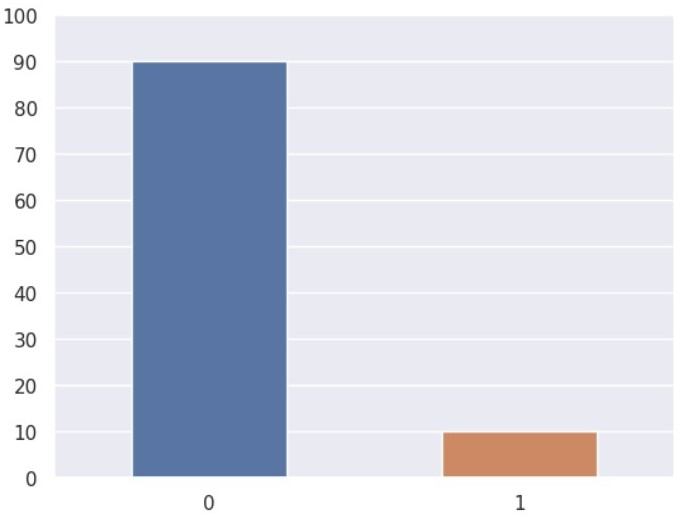

만약 타깃의 비율이 90%, 10%로 불균형하다면 어떨까요?<br>
95%의 데이터를 0으로 예측하고 나머지 5%의 데이터를 1로 예측하더라도 정확도는 95%가 나올 거에요.<br>

수치 상으로는 매우 높은 정확도를 보이는 좋은 모델이라고 평가할 수도 있지만,<br>
실제로는 분명히 절대 좋은 모델이라고 할 수 없을 겁니다!❌

이런 문제 때문에, 분류 문제에서는 주로 평가를 위해 **오차 행렬(confusion matrix)**을 사용한답니다.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*fxiTNIgOyvAombPJx5KGeA.png" width="700">

오차 행렬은 예측 값과 실제 값의 일치 여부를 위와 같이 표로 나타냅니다!<br>
만약 위의 문제에서 오차 행렬로 표현한다면 다음과 같은 결과가 나올 거에요.

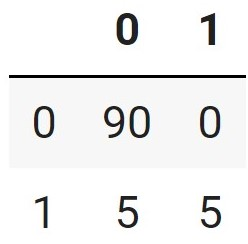

마찬가지로 sklearn 패키지의 metrics 모듈의 `confusion_matrix` 함수를 사용해서 평가하겠습니다.

In [17]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred, labels=[0, 1, 2])
print(cm)

[[ 164  156  330]
 [ 174  521  567]
 [ 379  582 2419]]


실제로는 `credit`을 0은 164/717 = 22.87%, 1은 521/1259 = 41.38%, 2는 2419/3316 = 72.95%의<br>
비율만 제대로 예측한 것을 볼 수 있네요.<br>
실제 예측 결과를 보니 어떤가요? 🤔 `credit`을 2로 예측한 거에 비해 0과 1로 예측한 것의 정확도가<br>
크게 떨어지네요.<br>
이후 스테이지 4, 5, 6에서 다양한 방법으로 예측 결과를 개선해보겠습니다!

## **Step 5. 예측하기 및 파일 제출**

이제 마지막 단계입니다!<br>
예측결과를 만들고 제출하도록 하겠습니다~<br>
일반적으로 sklearn 패키지의 모델들은 `predict()` 메서드로 예측결과를 만들 수 있습니다.<br>
저희는 확률로 결과를 저장하기 위해 `predict_proba()` 메서드로 예측결과를 만들도록 할게요!

In [19]:
pred = model.predict_proba(test)

submission.iloc[:,1:] = pred
submission

,index,0,1,2
0,26457,0,0,1
1,26458,0,0,1
2,26459,1,0,0
3,26460,0,0,1
4,26461,0,1,0
...,...,...,...,...
9995,36452,0,0,1
9996,36453,1,0,0
9997,36454,0,1,0
9998,36455,0,1,0


마지막으로 제출을 위해 파일을 예측 결과를 CSV 파일로 저장해주겠습니다!<br>
pandas의 `to_csv()` 메서드로 저장할 수 있습니다!<br>
파라미터로 `index=False`를 지정해주면 인덱스는 지정해주지 않고 저장할 수 있어요~

In [20]:
submission.to_csv("submission.csv", index=False)

여기까지 **스테이지 3. 모델링 기초**가 끝났습니다!<br>
벌써 스테이지 6 중 절반인 스테이지 3이 끝났어요~ 다음 스테이지에서는 무엇을 배울까요?<br>
다음 스테이지에서는 데이터 분석의 꽃이라 할 수 있는 <font color=green>**EDA**</font>를 진행해볼게요!📈<br>
다음 스테이지도 기대해주세요~ 😊